In [1]:
from zipfile import ZipFile
import pandas as pd
import os 
import torch
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Sequential, layers
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/IML_TASK4')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
curr_dir = os.getcwd()
curr_dir

'/content/drive/MyDrive/Colab Notebooks/IML_TASK4'

In [4]:
z = ZipFile(curr_dir + '/pretrain_features.csv.zip')
f = z.open('pretrain_features.csv')
pretrain_features_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/pretrain_labels.csv.zip')
f = z.open('pretrain_labels.csv')
pretrain_labels_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/train_features.csv.zip')
f = z.open('train_features.csv')
train_features_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/train_labels.csv.zip')
f = z.open('train_labels.csv')
train_labels_ori = pd.read_csv(f)
f.close()
z.close()

z = ZipFile(curr_dir+'/test_features.csv.zip')
f = z.open('test_features.csv')
test_features_ori = pd.read_csv(f)
f.close()
z.close()

In [5]:
#pretrain molecule features
pretrain_features_ori.head(3)

,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,0,c1occ2c1c1ccc3cscc3c1c1ncc3cc(ccc3c21)-c1cccc2...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,C1C=c2c(cc3ncc4c5[SiH2]C=Cc5oc4c3c2=C1)-c1scc2...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,C1C=c2c3cccnc3c3c4c[nH]cc4c4cc(cnc4c3c2=C1)-c1...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# pretrain molecule labels
pretrain_labels_ori.head(3)

,Id,lumo_energy
0,0,-3.111521
1,1,-3.219118
2,2,-3.114145


In [7]:
# training features
train_features_ori.head(3)

,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,50000,C1C=c2c3ccoc3c3c4ccccc4c(cc3c2=C1)-c1scc2ccsc12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50001,c1cc([se]c1-c1sc(-c2cccc3nsnc23)c2nccnc12)-c1c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50002,[SiH2]1C=CC=C1c1cc2cnc3c(sc4ccc5c[nH]cc5c34)c2...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# training labels
train_labels_ori.head(3)

,Id,homo_lumo_gap
0,50000,2.052872
1,50001,1.325530
2,50002,1.837294


In [9]:
# test features 
test_features_ori.head(3)

,Id,smiles,feature_0000,feature_0001,feature_0002,feature_0003,feature_0004,feature_0005,feature_0006,feature_0007,...,feature_0990,feature_0991,feature_0992,feature_0993,feature_0994,feature_0995,feature_0996,feature_0997,feature_0998,feature_0999
0,50100,c1cc2c(scc2[nH]1)-c1ccc(cn1)-c1sc(-c2scc3occc2...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50101,[SiH2]1C=Cc2ncc3c4oc(cc4c4cocc4c3c12)-c1ccc[se]1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50102,C1C=c2c3c(oc4cc(C5=CC=CC5)c5nsnc5c34)c3ccccc3c...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pretrain_features = pretrain_features_ori.iloc[:, 2:]
pretrain_labels = pretrain_labels_ori.iloc[:, 1:]
train_features = train_features_ori.iloc[:, 2:]
train_labels = train_labels_ori.iloc[:, 1:]
test_features = test_features_ori.iloc[:, 2:]

# to numpy 
pretrain_features.to_numpy()
train_features.to_numpy()
train_labels.to_numpy()
test_features.to_numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
n_inputs = pretrain_features.shape[1]
input_data = Input(shape=(1000, ))
encoded = Dense(units=784, kernel_initializer='he_uniform', activation='relu')(input_data)
# encoded = Dense(units=128, activation='relu')(input_data)
encoded = BatchNormalization()(encoded)
encoded = Dense(units=64, kernel_initializer='he_uniform', activation='relu')(encoded)
bottleneck = Dense(units=32, kernel_initializer='he_uniform', activation='sigmoid')(encoded)

decoded = Dense(units=64,  kernel_initializer='he_uniform',activation='relu')(bottleneck)
decoded = Dense(units=128, kernel_initializer='he_uniform',activation='relu')(decoded)
decoded = Dense(units=784, kernel_initializer='he_uniform',activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(units=1000, kernel_initializer='he_uniform',activation='sigmoid')(decoded) # changed here
autoencoder = Model(input_data, decoded)


encoder = Model(input_data, bottleneck) # we extract the encoded model
autoencoder.compile(loss='mse',optimizer='adam')

In [12]:
# plot_model(encoder, 'encoder.png', show_shapes=True)

In [13]:
# plot_model(autoencoder, 'autoencoder.png', show_shapes=True)

In [14]:
num_epochs = 100
batch_size = 120
train_batch_size = 60

In [15]:
X_pre_train, X_pre_val, y_pre_train, y_pre_val = train_test_split(pretrain_features, pretrain_labels, test_size=0.2, random_state=1)

In [16]:
history = autoencoder.fit(X_pre_train, X_pre_train, epochs= num_epochs, batch_size=batch_size, validation_data=(X_pre_val, X_pre_val), verbose=2, initial_epoch=0, workers=4)

Epoch 1/100
334/334 - 15s - loss: 0.0471 - val_loss: 0.0171 - 15s/epoch - 44ms/step
Epoch 2/100
334/334 - 13s - loss: 0.0123 - val_loss: 0.0125 - 13s/epoch - 38ms/step
Epoch 3/100
334/334 - 13s - loss: 0.0095 - val_loss: 0.0095 - 13s/epoch - 39ms/step
Epoch 4/100
334/334 - 13s - loss: 0.0080 - val_loss: 0.0084 - 13s/epoch - 39ms/step
Epoch 5/100
334/334 - 13s - loss: 0.0071 - val_loss: 0.0079 - 13s/epoch - 39ms/step
Epoch 6/100
334/334 - 13s - loss: 0.0064 - val_loss: 0.0071 - 13s/epoch - 39ms/step
Epoch 7/100
334/334 - 15s - loss: 0.0060 - val_loss: 0.0070 - 15s/epoch - 44ms/step
Epoch 8/100
334/334 - 13s - loss: 0.0056 - val_loss: 0.0060 - 13s/epoch - 39ms/step
Epoch 9/100
334/334 - 13s - loss: 0.0053 - val_loss: 0.0060 - 13s/epoch - 38ms/step
Epoch 10/100
334/334 - 13s - loss: 0.0051 - val_loss: 0.0058 - 13s/epoch - 39ms/step
Epoch 11/100
334/334 - 13s - loss: 0.0049 - val_loss: 0.0058 - 13s/epoch - 38ms/step
Epoch 12/100
334/334 - 13s - loss: 0.0047 - val_loss: 0.0055 - 13s/epoch -

In [17]:
#history = autoencoder.fit(pretrain_features, pretrain_features, epochs= num_epochs, batch_size=batch_size, verbose=2, initial_epoch=0, workers=4)

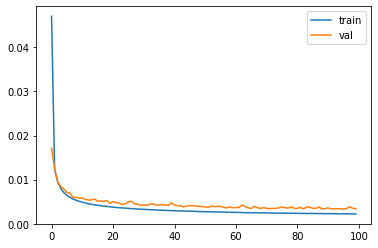

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [19]:
##### Pretraining starting here #####

In [20]:
# transform pretrain features 
pretrain_ft_encoded = encoder.predict(pretrain_features)
pretrain_ft_encoded.shape

(50000, 32)

In [21]:
# Model for predicting the lumo energy 
def get_nn(num_in, num_out):
    NN = Sequential()
    NN.add(Dense(32, input_dim=num_in, kernel_initializer='he_uniform', activation='relu'))
    NN.add(Dense(16, kernel_initializer='he_uniform', activation='relu'))
    # NN.add(Dense(5, kernel_initializer='he_uniform', activation='relu'))
    NN.add(Dense(num_out))
    opt = Adam(learning_rate=0.001)
    NN.compile(loss='mse', optimizer=opt, metrics=['mean_squared_error'])
    return NN

# calculate prediction error on lumo energy 
def RMSE(true, pred):
  squared_err = np.square(true-pred)
  sum_err = np.sum(squared_err)
  rmse_err = np.sqrt(sum_err / true.size)
  return rmse_err

Epoch 1/100
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2770 - mean_squared_error: 0.2770 - val_loss: 0.0657 - val_mean_squared_error: 0.0657
Epoch 2/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 3/100
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0476 - mean_squared_error: 0.0476 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 4/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 6/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 7/10

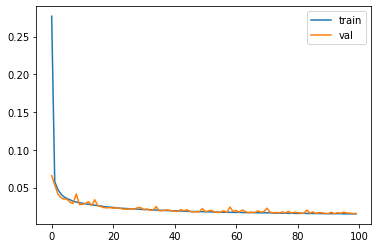

In [22]:
# split pretrain and pre_validation sets 
X_pre_train_enc, X_pre_val_enc, y_pre_train, y_pre_val = train_test_split(pretrain_ft_encoded, pretrain_labels, test_size=0.2, random_state=1)

# train on the encoded features 
num_in = X_pre_train_enc.shape[1]
model = get_nn(num_in, num_out=1) 
history_lumo = model.fit(X_pre_train_enc, y_pre_train, epochs=100, validation_data=(X_pre_val_enc, y_pre_val), batch_size=16)

# # predict on the validation set 
y_pre_pred = model.predict(X_pre_val_enc)
pretrain_error = RMSE(y_pre_val, y_pre_pred)
print("Pretrain error on validation set is: ", pretrain_error) 

plt.plot(history_lumo.history['loss'], label='train')
plt.plot(history_lumo.history['val_loss'], label='val')
plt.legend()
plt.show()

In [23]:
##### start processing the actual training features #####

In [24]:
# encoding features using autoencoder 
train_ft_encoded = encoder.predict(train_features)
test_ft_encoded = encoder.predict(test_features)

Epoch 1/100
5/5 [==============================] - 2s 116ms/step - loss: 2.3901 - mean_squared_error: 2.3901 - val_loss: 1.1598 - val_mean_squared_error: 1.1598
Epoch 2/100
5/5 [==============================] - 0s 24ms/step - loss: 1.5948 - mean_squared_error: 1.5948 - val_loss: 0.6199 - val_mean_squared_error: 0.6199
Epoch 3/100
5/5 [==============================] - 0s 19ms/step - loss: 0.9629 - mean_squared_error: 0.9629 - val_loss: 0.2653 - val_mean_squared_error: 0.2653
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5198 - mean_squared_error: 0.5198 - val_loss: 0.1061 - val_mean_squared_error: 0.1061
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.2532 - mean_squared_error: 0.2532 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1634 - mean_squared_error: 0.1634 - val_loss: 0.2043 - val_mean_squared_error: 0.2043
Epoch 7/100
5/5 [======================

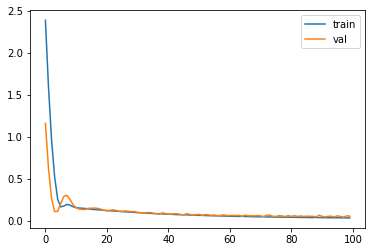

In [27]:

# split train and validation sets 
X_train_enc, X_val_enc, y_train, y_val = train_test_split(train_ft_encoded, train_labels, test_size=0.2, random_state=1)

# train on the small dataset 
num_in_gap = X_train_enc.shape[1]
model_gap = get_nn(num_in_gap, num_out=1) 
history_gap = model_gap.fit(X_train_enc, y_train, validation_data=(X_val_enc, y_val), epochs=100, batch_size=16)

# predict on validation set 
y_val_pred = model_gap.predict(X_val_enc)
train_error = RMSE(y_val, y_val_pred)
print("training error on validation set is: ", train_error)

y_pred = model_gap.predict(test_ft_encoded)

plt.plot(history_gap.history['loss'], label='train')
plt.plot(history_gap.history['val_loss'], label='val')
plt.legend()
plt.show()

In [28]:
header = ['Id', 'y']
IDs = np.array(test_features_ori.iloc[:, 0]).reshape(10000, 1)
predictions = np.concatenate((IDs, y_pred), axis=1)
with open("./predictions.csv", 'w', newline='',encoding='UTF8') as f:
      writer = csv.DictWriter(f, delimiter=',', fieldnames=header)
      writer.writeheader()
      
      new_writer = csv.writer(f, delimiter=',')
      for i in predictions:
        new_writer.writerow(['{:.3f}'.format(x) for x in i])